<a href="https://colab.research.google.com/github/trabajogrado28/Natali/blob/main/Natal%C3%AD_de_LimpiezaDeBase_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving fetal2020.csv to fetal2020 (1).csv


In [67]:
import pandas as pd
import io
datos_fetal2020 = pd.read_csv(io.BytesIO(uploaded['fetal2020 (1).csv']))
datos_fetal2020.head(6)

<ipython-input-67-aaa1feab5fbf>:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_fetal2020 = pd.read_csv(io.BytesIO(uploaded['fetal2020 (1).csv']))


,Unnamed: 0,cod_dpto,cod_munic,a_defun,sit_defun,otrsitiode,tipo_defun,ano,mes,hora,...,c_muerteb,c_muertec,c_muerted,c_muertee,asis_med,causa_mult,c_bas1,causa_667,idprofcer,cau_homol
0,0,70,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
1,1,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
2,2,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P059/P011,P011,402,1,80
3,3,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
4,4,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P964/P019,P964,406,1,86
5,5,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,1.0,NaN,NaN,1,P018,P018,402,1,80


In [68]:
datos_importantes = datos_fetal2020[['cod_dpto', 'seg_social', 'niv_edum', 'edad_madre']]

In [69]:
datos_rangos = datos_importantes[(datos_importantes["seg_social"] < 9) & (datos_importantes["niv_edum"] < 99) & (datos_importantes["edad_madre"] < 99)]
datos_rangos.head(4)

,cod_dpto,seg_social,niv_edum,edad_madre
0,70,2,4,3.0
1,11,1,4,5.0
2,11,5,9,5.0
3,11,5,5,3.0


In [70]:
datos_rangos.edad_madre.isnull()

,edad_madre
0,False
1,False
2,False
3,False
4,False
...,...
33322,False
33323,False
33324,False
33325,False


In [71]:
datos_rangos.loc[datos_rangos.edad_madre.notnull(), "edad_madre"]

,edad_madre
0,3.0
1,5.0
2,5.0
3,3.0
4,2.0
...,...
33322,5.0
33323,2.0
33324,3.0
33325,5.0


In [72]:
tabla_rangos = datos_rangos[["cod_dpto", "seg_social", "niv_edum", "edad_madre"]]
tabla_rangos1 = tabla_rangos[tabla_rangos.edad_madre.notnull()]
tabla_rangos1.head(4)

,cod_dpto,seg_social,niv_edum,edad_madre
0,70,2,4,3.0
1,11,1,4,5.0
2,11,5,9,5.0
3,11,5,5,3.0


In [73]:
tabla_rangos1.edad_madre.value_counts()

,count
edad_madre,
3.0,7858
4.0,7022
5.0,5307
2.0,4555
6.0,3823
7.0,1701
1.0,300
8.0,183
9.0,9


In [ ]:
#Ya entendi el error debo renombre acá cod_depto_arauca por ejemplo

In [74]:
data_dummies = pd.get_dummies(datos_rangos, columns=['cod_dpto', 'seg_social', 'niv_edum']).astype(int)
data_dummies.head()


,edad_madre,cod_dpto_5,cod_dpto_8,cod_dpto_11,cod_dpto_13,cod_dpto_15,cod_dpto_17,cod_dpto_18,cod_dpto_19,cod_dpto_20,...,niv_edum_4,niv_edum_5,niv_edum_6,niv_edum_7,niv_edum_8,niv_edum_9,niv_edum_10,niv_edum_11,niv_edum_12,niv_edum_13
0,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,5,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,5,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [75]:
data_dummies.edad_madre.value_counts()

,count
edad_madre,
3,7858
4,7022
5,5307
2,4555
6,3823
7,1701
1,300
8,183
9,9


In [76]:
data_dummies.columns

Index(['edad_madre', 'cod_dpto_5', 'cod_dpto_8', 'cod_dpto_11', 'cod_dpto_13',
       'cod_dpto_15', 'cod_dpto_17', 'cod_dpto_18', 'cod_dpto_19',
       'cod_dpto_20', 'cod_dpto_23', 'cod_dpto_25', 'cod_dpto_27',
       'cod_dpto_41', 'cod_dpto_44', 'cod_dpto_47', 'cod_dpto_50',
       'cod_dpto_52', 'cod_dpto_54', 'cod_dpto_63', 'cod_dpto_66',
       'cod_dpto_68', 'cod_dpto_70', 'cod_dpto_73', 'cod_dpto_76',
       'cod_dpto_81', 'cod_dpto_85', 'cod_dpto_86', 'cod_dpto_88',
       'cod_dpto_91', 'cod_dpto_94', 'cod_dpto_95', 'cod_dpto_97',
       'cod_dpto_99', 'seg_social_1', 'seg_social_2', 'seg_social_3',
       'seg_social_4', 'seg_social_5', 'niv_edum_1', 'niv_edum_2',
       'niv_edum_3', 'niv_edum_4', 'niv_edum_5', 'niv_edum_6', 'niv_edum_7',
       'niv_edum_8', 'niv_edum_9', 'niv_edum_10', 'niv_edum_11', 'niv_edum_12',
       'niv_edum_13'],
      dtype='object')

In [77]:
# "cod_dpto", "seg_social", "niv_edum", y, la salida es la variable "edad_madre"
x = data_dummies.drop(["edad_madre"], axis=1)
y = data_dummies["edad_madre"].astype(str)

# Corregir la clasificación
y.loc[y.isin(["1", "2", "6", "7", "8", "9"])] = "Si"  # Edades consideradas peligrosas
y.loc[y.isin(["3", "4", "5"])] = "No"                # Edades consideradas no peligrosas

# Ver los recuentos de las categorías resultantes
y.value_counts()

,count
edad_madre,
No,20187
Si,10571


In [78]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [79]:

from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,50,50, 50, 50, 50, 50),
                        max_iter = 300, activation = 'logistic',
                        solver = 'sgd') # Curva de pérdida adam o sgd

In [80]:
mlp_clf.fit(trainX, trainY) # Estimación de los parámetros sobre los datos de entrenamiento
y_pred = mlp_clf.predict(testX) # Predicción sobre los datos de validación (comparar la predicción con los datos de validación)


In [81]:
from sklearn.metrics import accuracy_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred, testY)))



Accuracy: 0.65


Text(0.5, 1.0, 'Confusion Matrix')

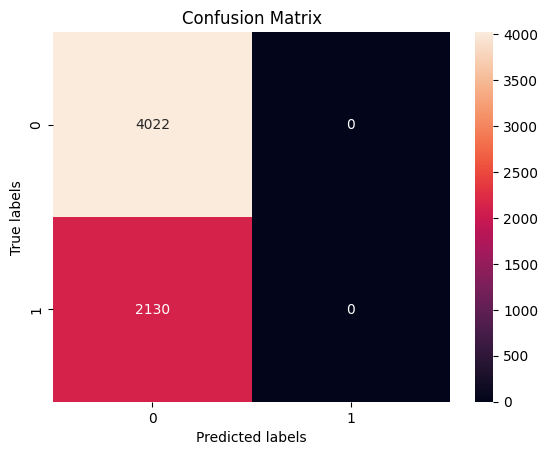

In [82]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(testY, y_pred)
cm
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')


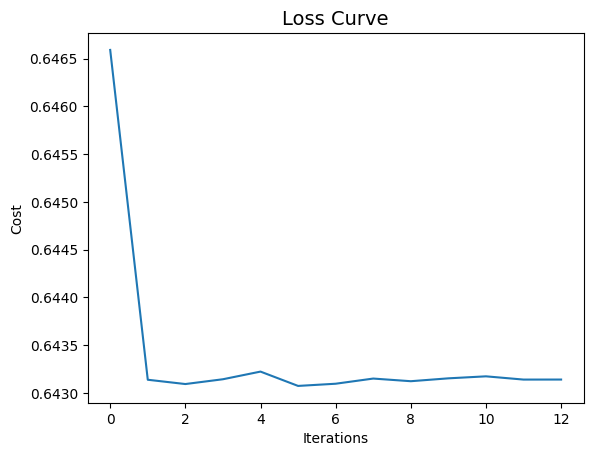

In [83]:

plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


In [84]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(trainX, trainY)
y_pred_random = random_forest.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred_random, testY)))


Accuracy: 0.66


Text(0.5, 1.0, 'Confusion Matrix')

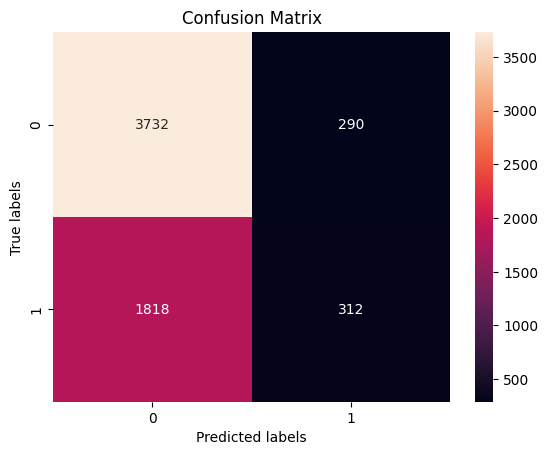

In [85]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm1 = confusion_matrix(testY, y_pred_random)
cm1
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm1, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')


In [86]:
from sklearn.naive_bayes import GaussianNB
clase_bayes = GaussianNB()
clase_bayes.fit(trainX, trainY)
y_pred_bayes = clase_bayes.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred_bayes, testY)))

Accuracy: 0.63


Text(0.5, 1.0, 'Confusion Matrix')

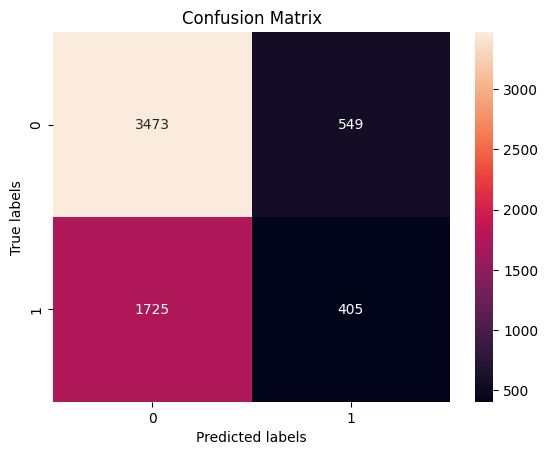

In [87]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm2 = confusion_matrix(testY, y_pred_bayes)
cm2
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm2, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

In [88]:
from sklearn.svm import SVC
soporte_vect = SVC(decision_function_shape='ovr', kernel = "rbf", degree = 3)
soporte_vect.fit(trainX, trainY)
y_pred_sopor = soporte_vect.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred_sopor, testY)))


Accuracy: 0.66


Text(0.5, 1.0, 'Confusion Matrix')

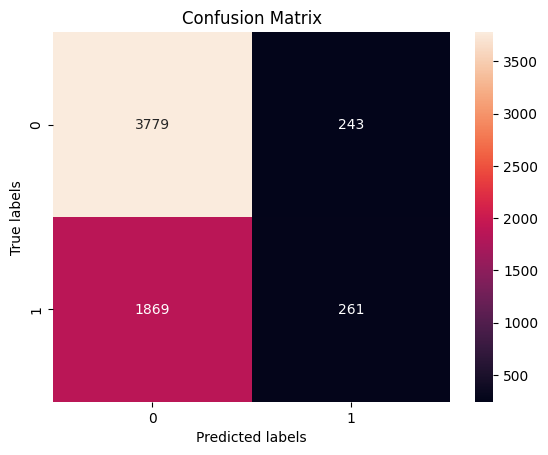

In [89]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm2 = confusion_matrix(testY, y_pred_sopor)
cm2
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm2, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
